In [1]:
dat=read.csv2("final reults.csv")
data=dat[!dat$Process=="undefined",]
colnames(data)
summary(data)


[1] "item_code"      "Process"        "IRT_difficulty" "KNN"           
[5] "RBF_SVM"        "Rand_Forest"    "AdaBoost"       "Naive_Bayes"   
[9] "QDA"

   item_code        Process    IRT_difficulty         KNN        
 EM_16b :  1   remember : 13   Min.   :-2.0000   Min.   :0.0000  
 EM_21a :  1   transfer :117   1st Qu.:-0.2010   1st Qu.:0.5357  
 EM_21b :  1   undefined:  0   Median : 0.4050   Median :0.7670  
 EM_26  :  1                   Mean   : 0.4135   Mean   :0.7295  
 EM_27b :  1                   3rd Qu.: 1.0000   3rd Qu.:1.0000  
 EM_35  :  1                   Max.   : 3.0000   Max.   :1.0000  
 (Other):124                                                     
    RBF_SVM        Rand_Forest        AdaBoost       Naive_Bayes    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5000   1st Qu.:0.3330   1st Qu.:0.4250   1st Qu.:0.3083  
 Median :0.7500   Median :0.6430   Median :0.6670   Median :0.5000  
 Mean   :0.7038   Mean   :0.5377   Mean   :0.6465   Mean   :0.4927  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.7165  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.  

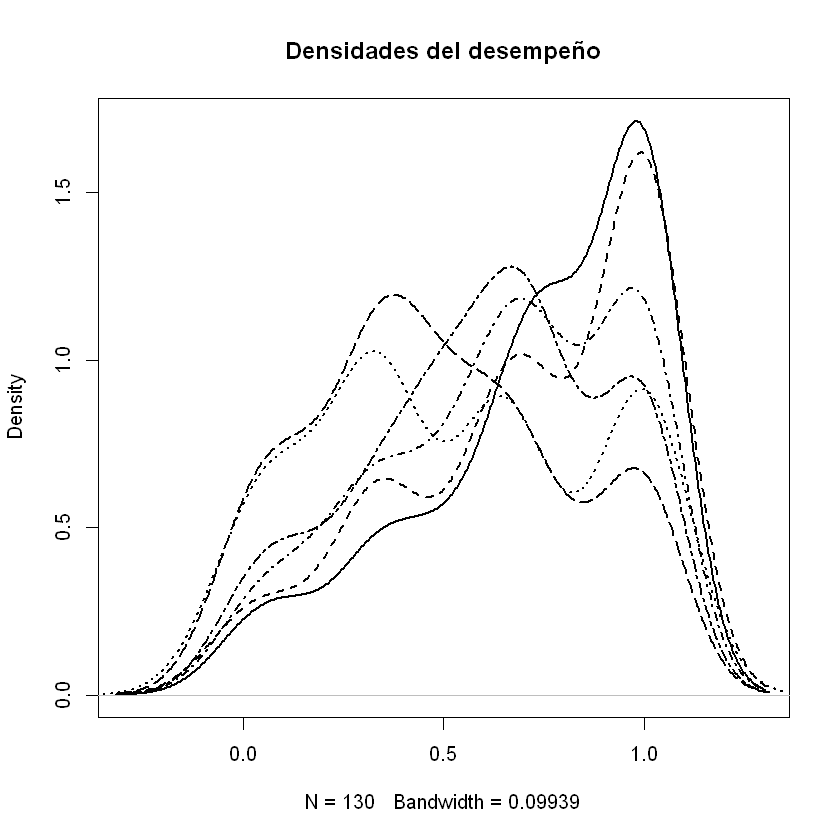

In [19]:
plot(density(data$KNN),col="black", lwd=2, lty=1, main="Densidades del desempeño")
lines(density(data$RBF_SVM),col="black", lwd=2, lty=2)
lines(density(data$Rand_Forest),col="black", lwd=2, lty=3)
lines(density(data$AdaBoost),col="black", lwd=2, lty=4)
lines(density(data$Naive_Bayes),col="black", lwd=2, lty=5)
lines(density(data$QDA),col="black", lwd=2, lty=6)

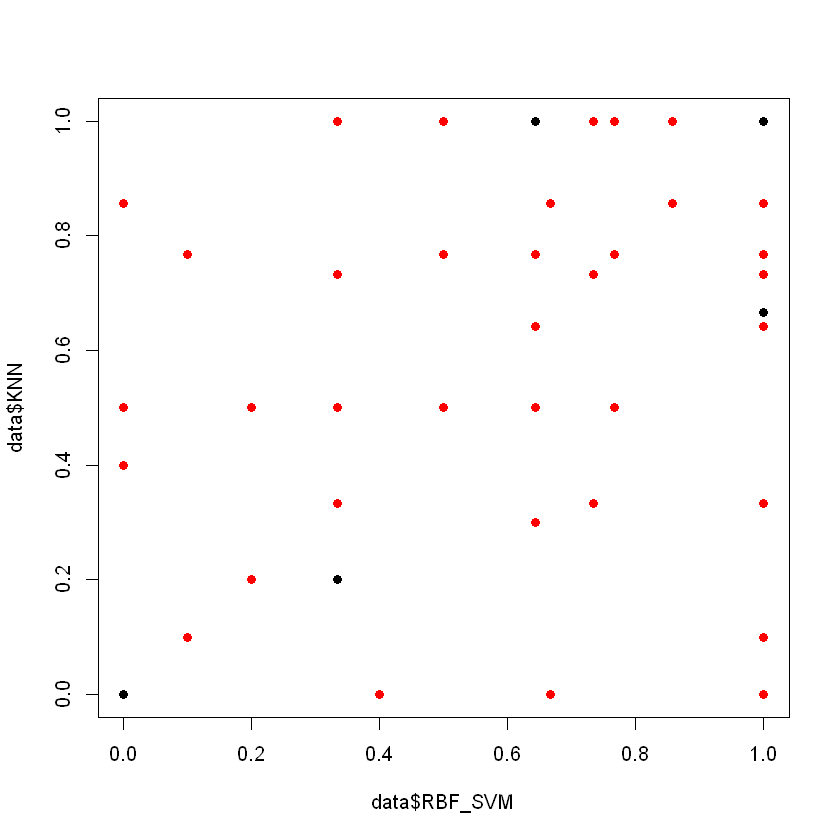

In [3]:
plot(data$RBF_SVM, data$KNN, pch=16, col=data$Process)

In [4]:
t.test(IRT_difficulty ~ Process, data=data)
t.test(KNN ~ Process, data=data)
t.test(RBF_SVM ~ Process, data=data)
t.test(Rand_Forest ~ Process, data=data)
t.test(AdaBoost ~ Process, data=data)
t.test(Naive_Bayes ~ Process, data=data)
t.test(QDA ~ Process, data=data)


	Welch Two Sample t-test

data:  IRT_difficulty by Process
t = 1.2448, df = 15.369, p-value = 0.2319
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2401154  0.9177393
sample estimates:
mean in group remember mean in group transfer 
             0.7184615              0.3796496 



	Welch Two Sample t-test

data:  KNN by Process
t = -0.80885, df = 13.946, p-value = 0.4322
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2906799  0.1315175
sample estimates:
mean in group remember mean in group transfer 
             0.6579231              0.7375043 



	Welch Two Sample t-test

data:  RBF_SVM by Process
t = -0.65531, df = 13.872, p-value = 0.523
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3001430  0.1597499
sample estimates:
mean in group remember mean in group transfer 
             0.6406154              0.7108120 



	Welch Two Sample t-test

data:  Rand_Forest by Process
t = 0.47873, df = 14.116, p-value = 0.6395
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1865543  0.2938705
sample estimates:
mean in group remember mean in group transfer 
             0.5860000              0.5323419 



	Welch Two Sample t-test

data:  AdaBoost by Process
t = -0.2033, df = 14.574, p-value = 0.8417
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2149674  0.1776170
sample estimates:
mean in group remember mean in group transfer 
             0.6296923              0.6483675 



	Welch Two Sample t-test

data:  Naive_Bayes by Process
t = -0.9157, df = 15.886, p-value = 0.3735
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2447914  0.0971675
sample estimates:
mean in group remember mean in group transfer 
             0.4263077              0.5001197 



	Welch Two Sample t-test

data:  QDA by Process
t = -0.72853, df = 15.196, p-value = 0.4774
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2363490  0.1158362
sample estimates:
mean in group remember mean in group transfer 
             0.5502308              0.6104872 


In [5]:

cor.test(data$IRT_difficulty, data$KNN)
cor.test(data$IRT_difficulty, data$RBF_SVM)
cor.test(data$IRT_difficulty, data$Rand_Forest)
cor.test(data$IRT_difficulty, data$AdaBoost)
cor.test(data$IRT_difficulty, data$Naive_Bayes)
cor.test(data$IRT_difficulty, data$QDA)


	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$KNN
t = 0.021689, df = 128, p-value = 0.9827
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1703253  0.1740457
sample estimates:
        cor 
0.001917029 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$RBF_SVM
t = -1.9844, df = 128, p-value = 0.04935
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3349799689 -0.0005898419
sample estimates:
       cor 
-0.1727584 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$Rand_Forest
t = 1.8644, df = 128, p-value = 0.06455
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.009860089  0.325670106
sample estimates:
      cor 
0.1626021 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$AdaBoost
t = 0.021, df = 128, p-value = 0.9833
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1703844  0.1739867
sample estimates:
        cor 
0.001856173 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$Naive_Bayes
t = -0.42987, df = 128, p-value = 0.668
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2087890  0.1351015
sample estimates:
        cor 
-0.03796784 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$QDA
t = 0.034584, df = 128, p-value = 0.9725
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1692183  0.1751507
sample estimates:
       cor 
0.00305682 


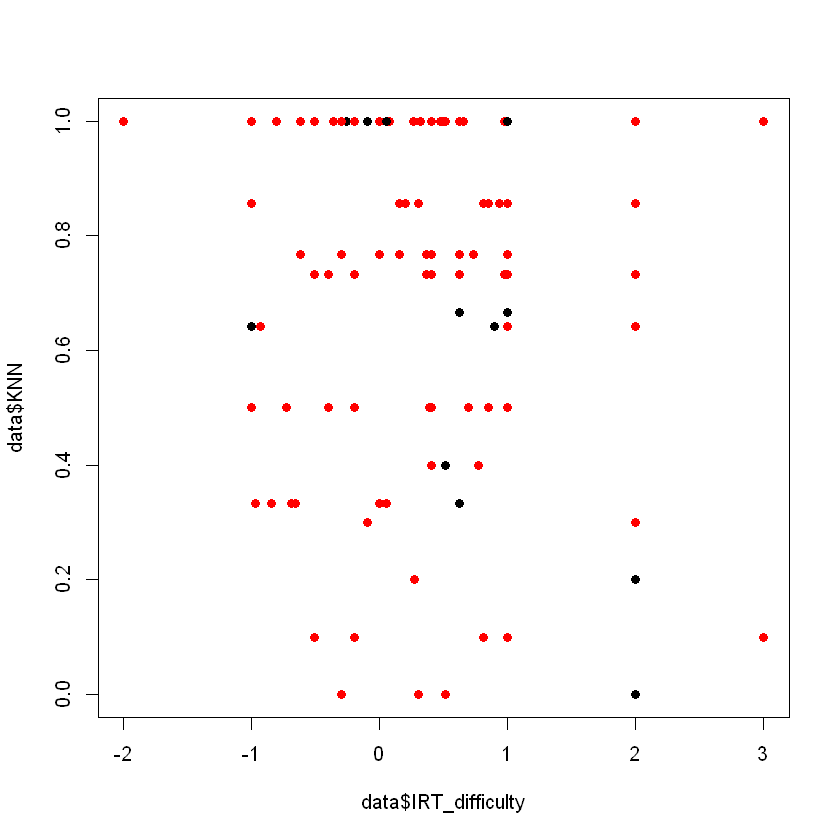

In [21]:
plot(data$IRT_difficulty, data$KNN, pch=16, col=data$Process)
# plot(data$IRT_difficulty, data$RBF_SVM, pch=16, col=data$Process)
# plot(data$IRT_difficulty, data$Rand_Forest, pch=16, col=data$Process)
# plot(data$IRT_difficulty, data$AdaBoost, pch=16, col=data$Process)
# plot(data$IRT_difficulty, data$Naive_Bayes, pch=16, col=data$Process)
# plot(data$IRT_difficulty, data$QDA, pch=16, col=data$Process)


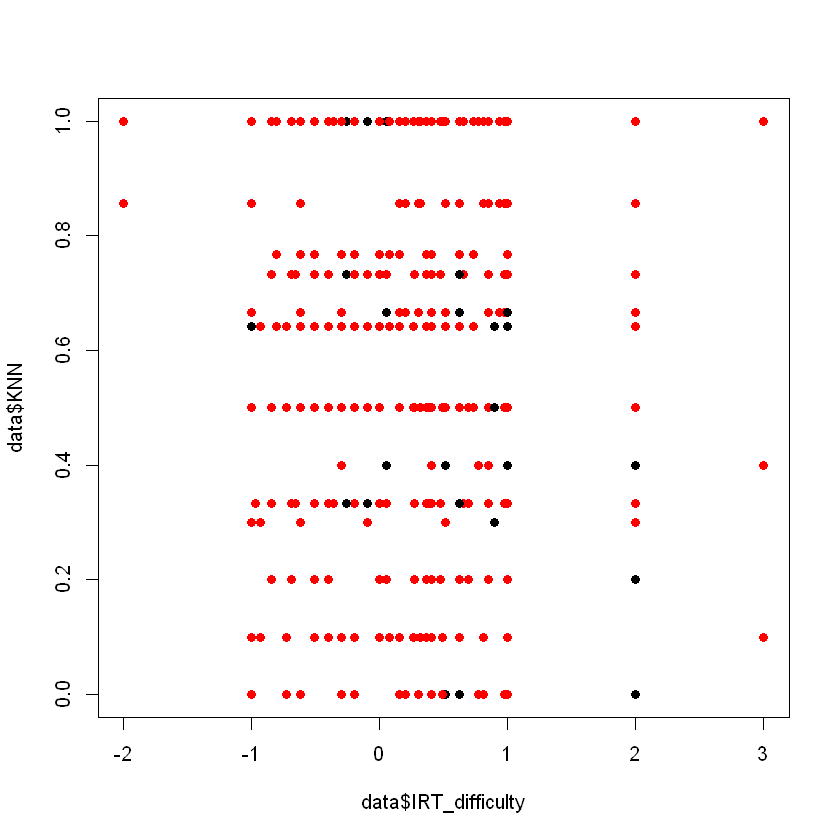

In [8]:
plot(data$IRT_difficulty, data$KNN, pch=16, col=data$Process)
points(data$IRT_difficulty, data$RBF_SVM, pch=16, col=data$Process)
points(data$IRT_difficulty, data$Rand_Forest, pch=16, col=data$Process)
points(data$IRT_difficulty, data$AdaBoost, pch=16, col=data$Process)
points(data$IRT_difficulty, data$Naive_Bayes, pch=16, col=data$Process)
points(data$IRT_difficulty, data$QDA, pch=16, col=data$Process)

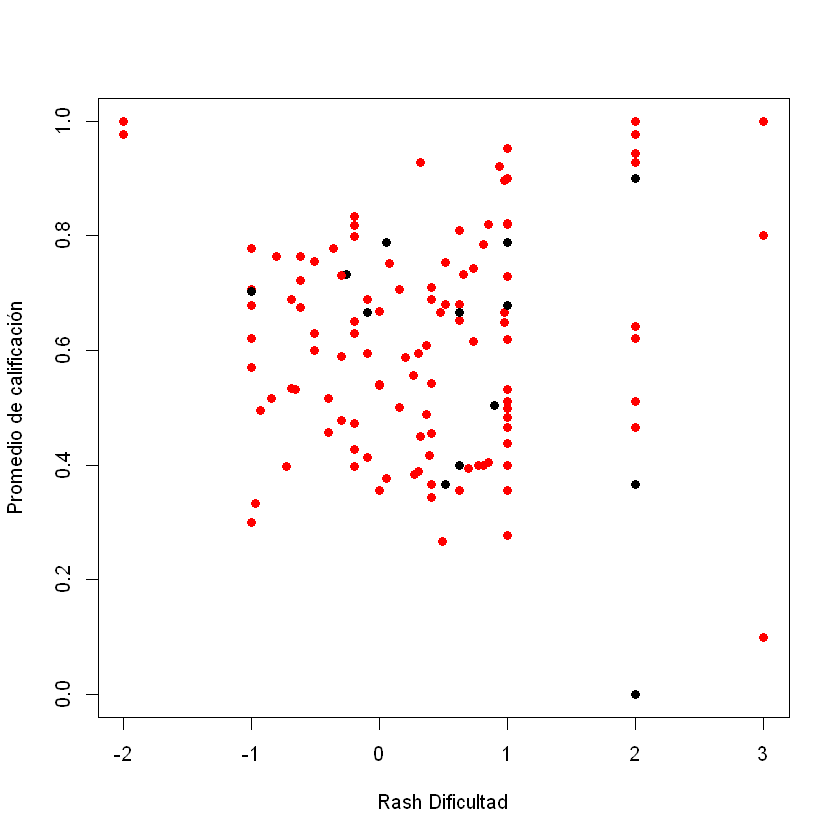

In [10]:
plot(data$IRT_difficulty, 
	rowMeans(data[,c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA")]),
	pch=16, col=data$Process, 
    xlab="Rash Dificultad",
    ylab="Promedio de calificación")

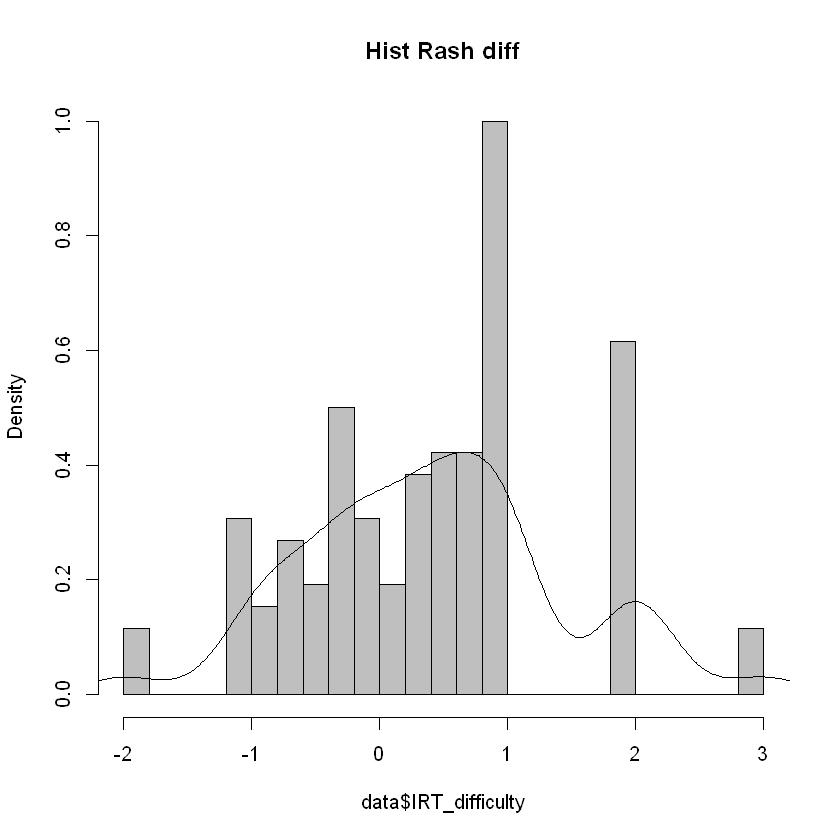

In [12]:
hist(data$IRT_difficulty, 
	col="gray75", 
	freq=FALSE,
	breaks=20,
	main="Hist Rash diff")
lines(density(data$IRT_difficulty))


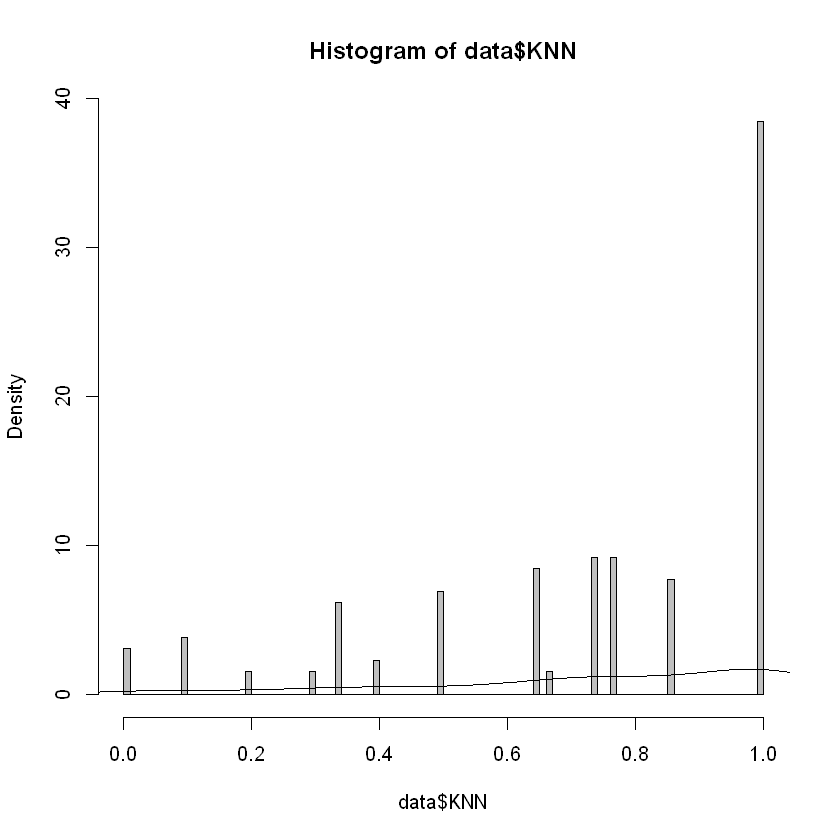

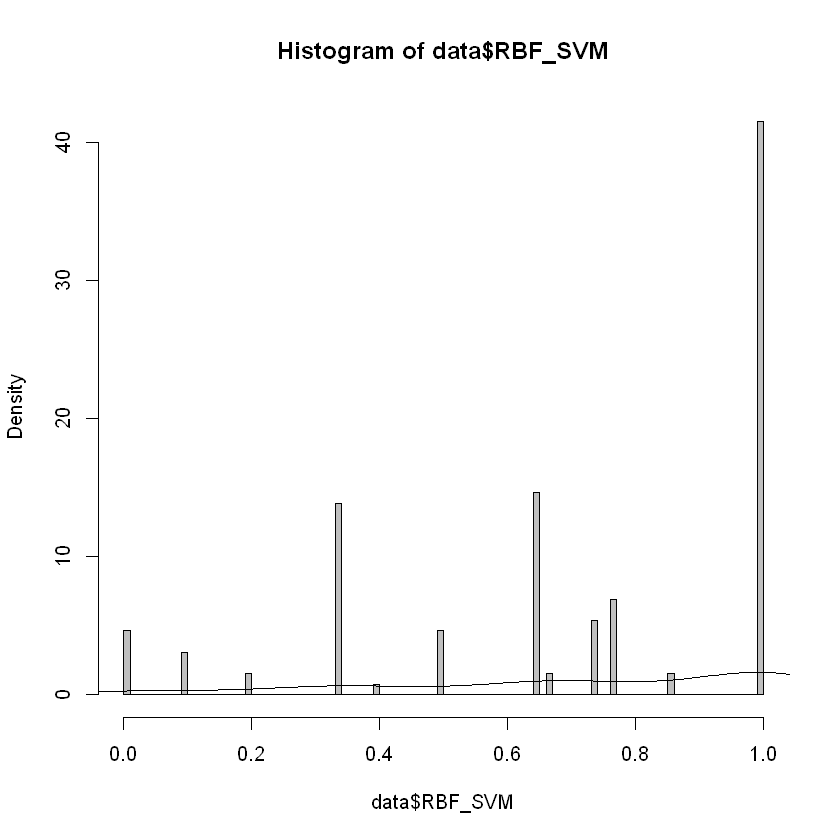

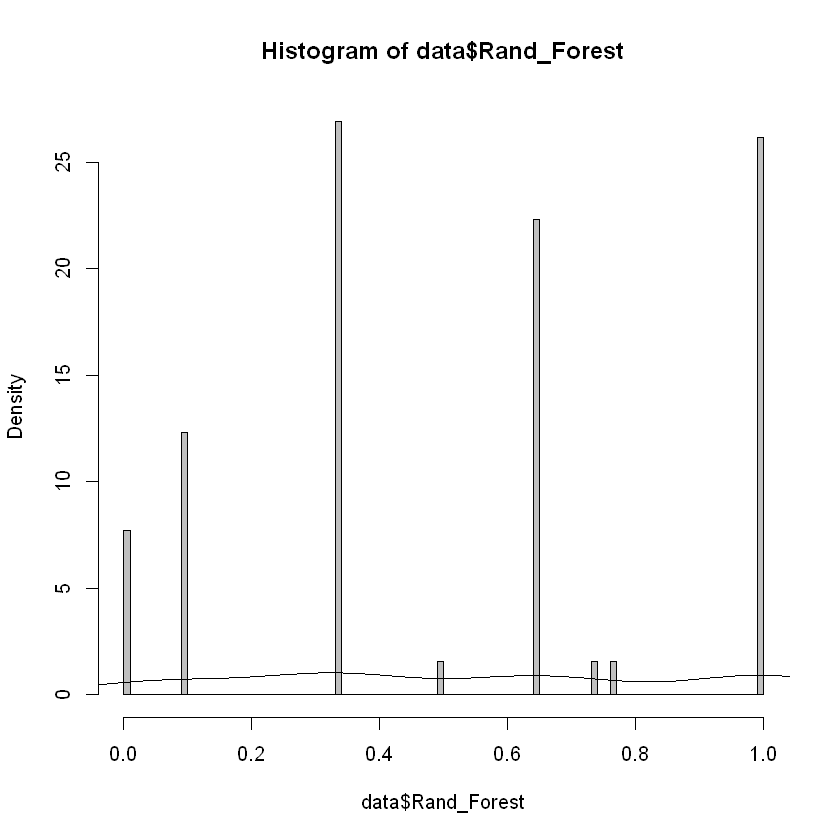

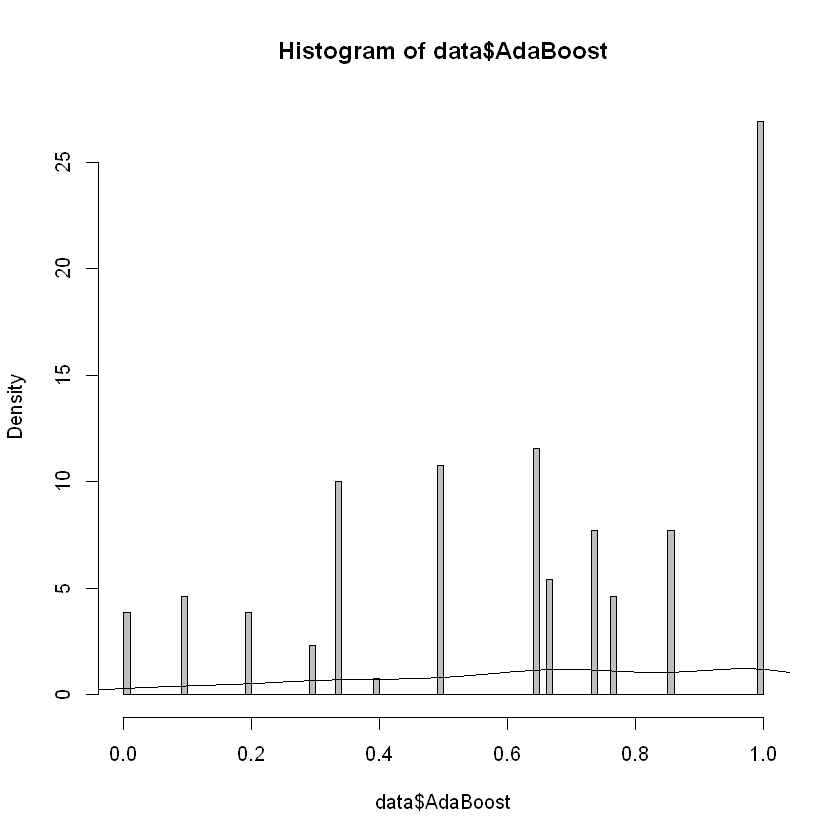

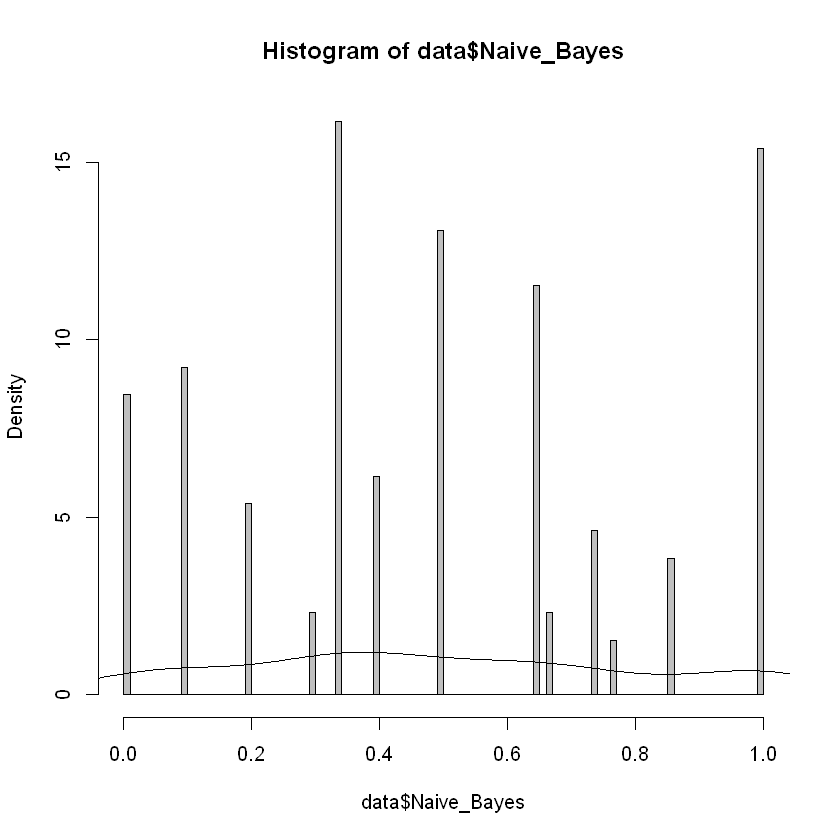

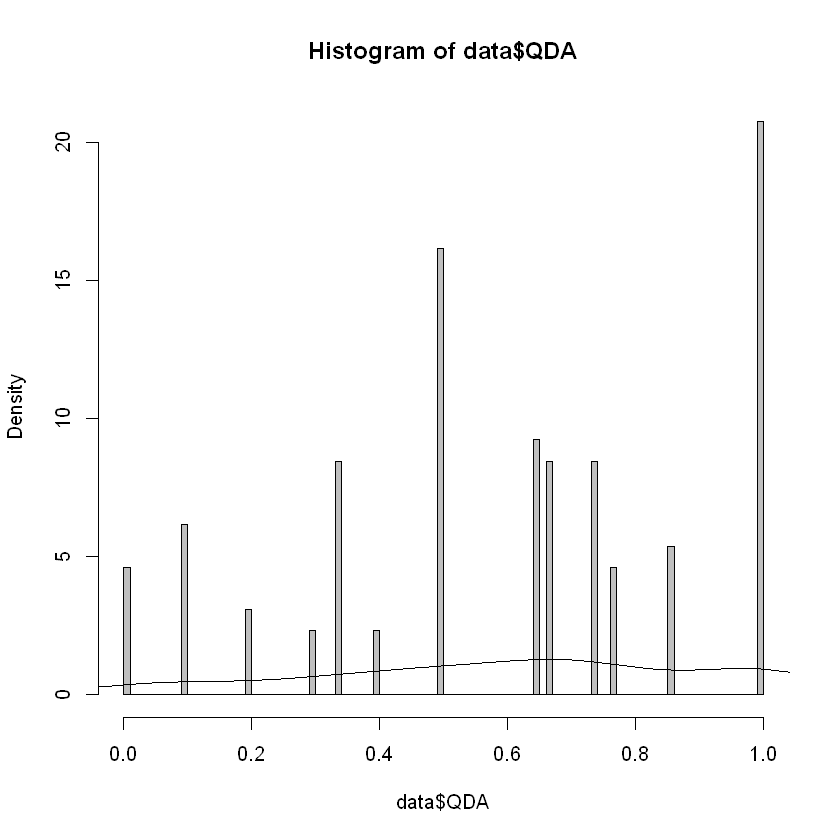

In [15]:
hist(data$KNN, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$KNN))

hist(data$RBF_SVM, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$RBF_SVM))

hist(data$Rand_Forest, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$Rand_Forest))

hist(data$AdaBoost, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$AdaBoost))

hist(data$Naive_Bayes, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$Naive_Bayes))

hist(data$QDA, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$QDA))

